<h1 style="color: red" > You must ask these questions to yourself before performing EDA</h1>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/Titanic-Dataset.csv')

## 1. How big is the data?

In [3]:
df.shape

(891, 12)

## 2. How does the data look like?

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.0500,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S


## 3. What is the data type of cols?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Are there any missing values?

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. How does the data look mathematically?

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 6. Are there duplicate values?

In [8]:
df.duplicated().sum()

np.int64(0)

## 7. How is the correlation between cols?

In [9]:
df.corr(numeric_only = True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<h1 style="color: red" >To know about Each Column we perform Univariate Analysis</h1>

## 1) First we explore only Categorical columns

In [12]:
df.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S


#### list of Categorical Columns in this Datasets: ['Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']

### 1) Survived Column

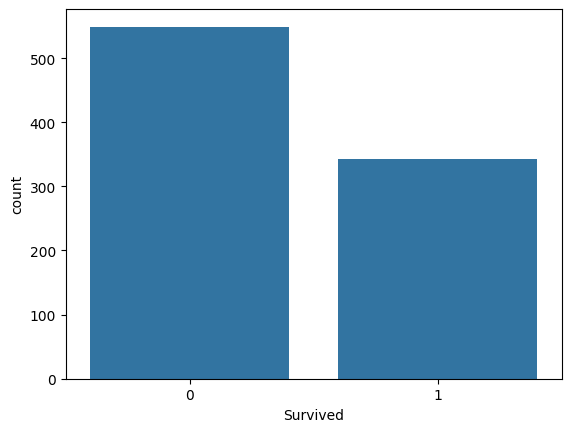

In [21]:
# To Know Survived column
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = 'Survived',data = df)
plt.show()

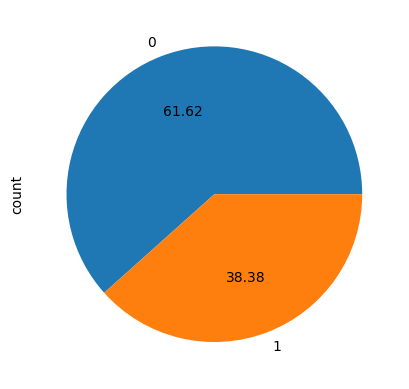

In [46]:
df['Survived'].value_counts().plot(kind = 'pie',autopct= '%.2f')
plt.show()

In [27]:
# df['Survived'].value_counts().plot(kind = 'bar')
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<h3 style="color: green">Insight: Around 62% of passengers did not survive (549), while only 38% survived (342).</h3>

### 2) Pclass Column

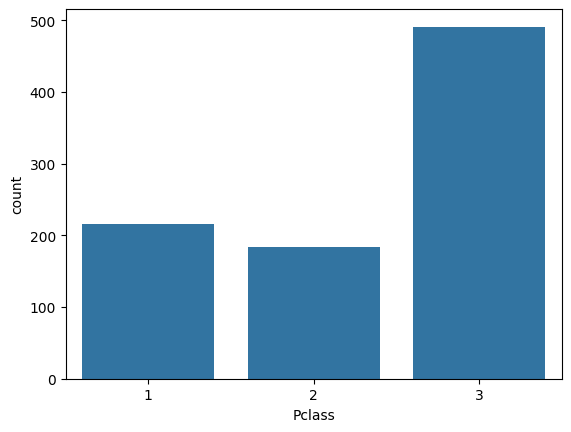

In [40]:
# now understand Pclass
sns.countplot(x = 'Pclass',data = df)
plt.show()

<h3 style="color: green">Insight: Most passengers traveled in 3rd class, while the fewest were in 2nd class.</h3>

### 3) Sex Column

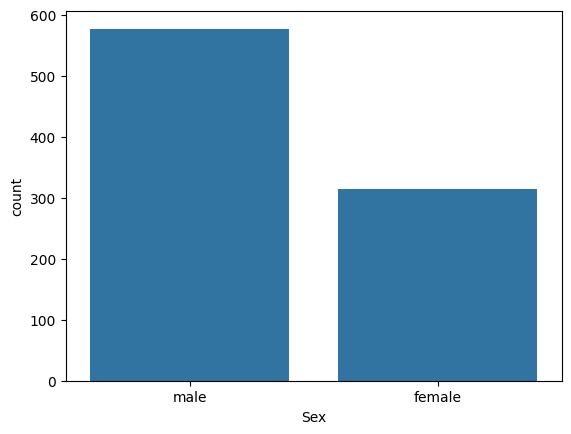

In [42]:
sns.countplot(x = 'Sex',data = df)
plt.show()

In [43]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<h3 style="color: green">Insight: The dataset has more male passengers than female passengers.</h3>

### 4) Embarked Column

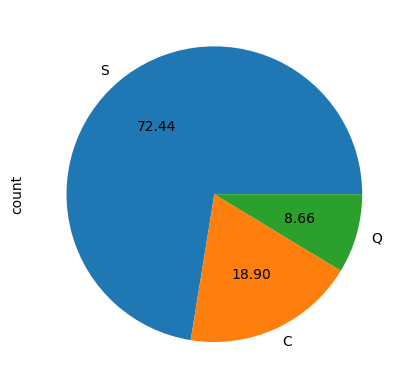

In [45]:
df['Embarked'].value_counts().plot(kind = 'pie',autopct= '%.2f')
plt.show()

<h3 style="color: green">Insight: Most passengers embarked from Southampton (72%), followed by Cherbourg (18.90%), and the fewest from Queenstown (8.66%).</h3>

## 2) Now we explore Numerical Columns

#### list of Numerical Columns in this Datasets: ['PassengerId','Age','SibSp','Parch','Fare']

## 1) Age column

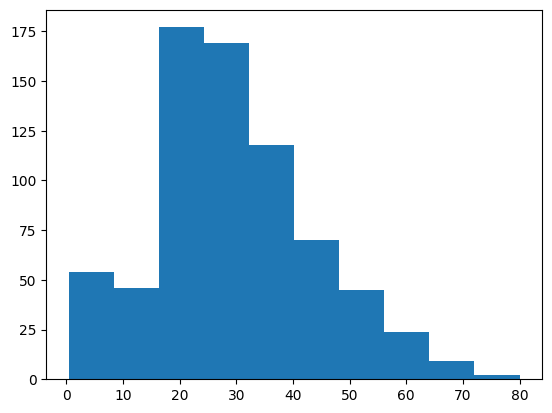

In [50]:
plt.hist(df['Age'])
plt.show()

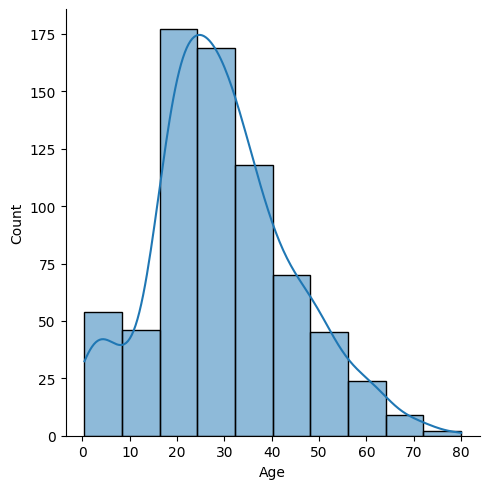

In [57]:
sns.displot(x = 'Age',data = df,kde = True,bins = 10)
plt.show()

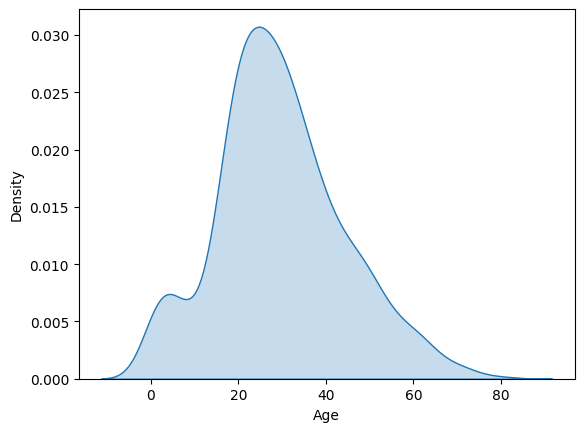

In [61]:
sns.kdeplot(x = 'Age',data = df,fill = True) # Probability Density Fonction
plt.show()

In [63]:
df['Age'].skew()

np.float64(0.38910778230082704)

<h3 style="color: green">Insight: The age distribution is right-skewed with most passengers between 20–30 years, and the probability density shows that the chance of a passenger being around age 25 is the highest, while it decreases steadily after age 40</h3>

## 2) Fare Column

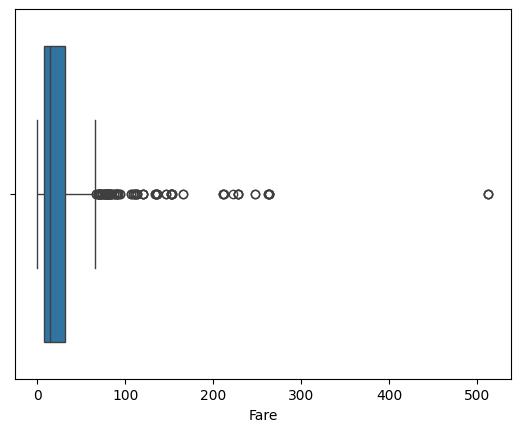

In [62]:
sns.boxplot(x = "Fare",data = df)
plt.show()

<h3 style="color: green">Insight: Most passengers paid relatively low fares, but there are significant outliers with very high fares, indicating a right-skewed distribution.</h3>